<a href="https://colab.research.google.com/github/Skephty/matpotlibPython/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
data = pd.DataFrame({
    'X1': [34, 30, 36, 38, 41, 47, 56, 54, 62, 55, 61, 65, 69, 76],
    'X2': [33, 34, 41, 39, 46, 40, 34, 38, 42, 38, 39, 44, 37, 41],
    'X3': [127, 120, 112, 117, 106, 128, 113, 114, 115, 121, 106, 111, 108, 117],
    'Y': [20, 24, 28, 30, 31, 33, 34, 37, 38, 40, 41, 43, 45, 48]
})

In [ ]:
print("1. ИСХОДНЫЕ ДАННЫЕ")
print("-" * 60)
print(data.to_string(index=False))
print()



1. ИСХОДНЫЕ ДАННЫЕ
------------------------------------------------------------
 X1  X2  X3  Y
 34  33 127 20
 30  34 120 24
 36  41 112 28
 38  39 117 30
 41  46 106 31
 47  40 128 33
 56  34 113 34
 54  38 114 37
 62  42 115 38
 55  38 121 40
 61  39 106 41
 65  44 111 43
 69  37 108 45
 76  41 117 48



In [ ]:
n = len(data)
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

In [ ]:
X_with_const = np.column_stack([np.ones(n), X])

XtX = X_with_const.T @ X_with_const
XtY = X_with_const.T @ Y
beta = np.linalg.inv(XtX) @ XtY

b0, b1, b2, b3 = beta

In [ ]:
print("2. УРАВНЕНИЕ РЕГРЕССИИ")
print("-" * 60)
print(f"Y = {b0:.4f} + {b1:.4f}·X1 + {b2:.4f}·X2 + {b3:.4f}·X3")
print()
print(f"  b0 (свободный член) = {b0:.4f}")
print(f"  b1 (коэффициент X1) = {b1:.4f}")
print(f"  b2 (коэффициент X2) = {b2:.4f}")
print(f"  b3 (коэффициент X3) = {b3:.4f}")
print()

2. УРАВНЕНИЕ РЕГРЕССИИ
------------------------------------------------------------
Y = 4.8931 + 0.5121·X1 + 0.2668·X2 + -0.0576·X3

  b0 (свободный член) = 4.8931
  b1 (коэффициент X1) = 0.5121
  b2 (коэффициент X2) = 0.2668
  b3 (коэффициент X3) = -0.0576



In [ ]:
Y_pred = X_with_const @ beta
residuals = Y - Y_pred
Y_mean = np.mean(Y)
SST = np.sum((Y - Y_mean)**2)
SSE = np.sum(residuals**2)
SSR = SST - SSE
R2 = SSR / SST
adj_R2 = 1 - (1 - R2) * (n - 1) / (n - 4)
Se = np.sqrt(SSE / (n - 4))

In [ ]:
print("3. ОЦЕНКА КАЧЕСТВА МОДЕЛИ")
print("-" * 60)
print(f"R² (коэффициент детерминации) = {R2:.4f}")
print(f"Скорректированный R²          = {adj_R2:.4f}")
print(f"Стандартная ошибка (Se)       = {Se:.4f}")
print()
print(f"Модель объясняет {R2*100:.2f}% вариации Y")
print()

3. ОЦЕНКА КАЧЕСТВА МОДЕЛИ
------------------------------------------------------------
R² (коэффициент детерминации) = 0.9359
Скорректированный R²          = 0.9167
Стандартная ошибка (Se)       = 2.3311

Модель объясняет 93.59% вариации Y



In [ ]:
df_reg = 3
df_res = n - 4

MSR = SSR / df_reg
MSE = SSE / df_res
F_stat = MSR / MSE

F_crit = stats.f.ppf(0.95, df_reg, df_res)

In [ ]:
print("4. F-ТЕСТ (ЗНАЧИМОСТЬ МОДЕЛИ)")
print("-" * 60)
print(f"F-статистика      = {F_stat:.4f}")
print(f"F-критическое (α=0.05) = {F_crit:.4f}")
print(f"Степени свободы: df1={df_reg}, df2={df_res}")
print()
if F_stat > F_crit:
    print("✓ Модель ЗНАЧИМА (F > F_crit)")
else:
    print("✗ Модель НЕЗНАЧИМА (F < F_crit)")
print()

4. F-ТЕСТ (ЗНАЧИМОСТЬ МОДЕЛИ)
------------------------------------------------------------
F-статистика      = 48.6671
F-критическое (α=0.05) = 3.7083
Степени свободы: df1=3, df2=10

✓ Модель ЗНАЧИМА (F > F_crit)



In [ ]:
cov_matrix = Se**2 * np.linalg.inv(XtX)
se_coeffs = np.sqrt(np.diag(cov_matrix))

t_stats = beta / se_coeffs
t_crit = stats.t.ppf(0.975, df_res)

print("5. t-ТЕСТЫ (ЗНАЧИМОСТЬ КОЭФФИЦИЕНТОВ)")
print("-" * 60)
print(f"t-критическое (α=0.05) = {t_crit:.4f}")
print()

5. t-ТЕСТЫ (ЗНАЧИМОСТЬ КОЭФФИЦИЕНТОВ)
------------------------------------------------------------
t-критическое (α=0.05) = 2.2281



In [ ]:
coef_names = ['b0', 'b1 (X1)', 'b2 (X2)', 'b3 (X3)']
for i, name in enumerate(coef_names):
    significant = "✓ ЗНАЧИМ" if abs(t_stats[i]) > t_crit else "✗ незначим"
    print(f"{name:10s}: t = {t_stats[i]:7.4f}, SE = {se_coeffs[i]:.4f}  {significant}")
print()

b0        : t =  0.2791, SE = 17.5295  ✗ незначим
b1 (X1)   : t = 10.4443, SE = 0.0490  ✓ ЗНАЧИМ
b2 (X2)   : t =  1.3795, SE = 0.1934  ✗ незначим
b3 (X3)   : t = -0.5289, SE = 0.1088  ✗ незначим



In [ ]:
print("6. ДИАГНОСТИКА ОСТАТКОВ")
print("-" * 60)
print(f"Среднее остатков        = {np.mean(residuals):.4f} (должно ≈ 0)")
print(f"Стандартное отклонение  = {np.std(residuals):.4f}")
print(f"Минимальный остаток     = {np.min(residuals):.4f}")
print(f"Максимальный остаток    = {np.max(residuals):.4f}")
print()

6. ДИАГНОСТИКА ОСТАТКОВ
------------------------------------------------------------
Среднее остатков        = 0.0000 (должно ≈ 0)
Стандартное отклонение  = 1.9701
Минимальный остаток     = -3.8001
Максимальный остаток    = 3.7659



In [ ]:
print("7. ПРОГНОЗ")
print("-" * 60)
X1_new, X2_new, X3_new = 50, 40, 120
Y_forecast = b0 + b1*X1_new + b2*X2_new + b3*X3_new

print(f"Для X1={X1_new}, X2={X2_new}, X3={X3_new}:")
print(f"Прогнозируемое значение Y = {Y_forecast:.2f}")
print()

7. ПРОГНОЗ
------------------------------------------------------------
Для X1=50, X2=40, X3=120:
Прогнозируемое значение Y = 34.26



In [ ]:
print("8. ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("-" * 60)
results_df = pd.DataFrame({
    '№': range(1, n+1),
    'X1': X[:, 0],
    'X2': X[:, 1],
    'X3': X[:, 2],
    'Y_факт': Y,
    'Y_пред': Y_pred,
    'Остаток': residuals
})
print(results_df.to_string(index=False))
print()

8. ТАБЛИЦА РЕЗУЛЬТАТОВ
------------------------------------------------------------
 №  X1  X2  X3  Y_факт    Y_пред   Остаток
 1  34  33 127      20 23.800088 -3.800088
 2  30  34 120      24 22.421192  1.578808
 3  36  41 112      28 27.821815  0.178185
 4  38  39 117      30 28.024775  1.975225
 5  41  46 106      31 32.061655 -1.061655
 6  47  40 128      33 32.267676  0.732324
 7  56  34 113      34 36.139500 -2.139500
 8  54  38 114      37 36.124778  0.875222
 9  62  42 115      38 41.231382 -3.231382
10  55  38 121      40 36.234050  3.765950
11  61  39 106      41 40.436892  0.563108
12  65  44 111      43 43.531533 -0.531533
13  69  37 108      45 43.885302  1.114698
14  76  41 117      48 48.019362 -0.019362



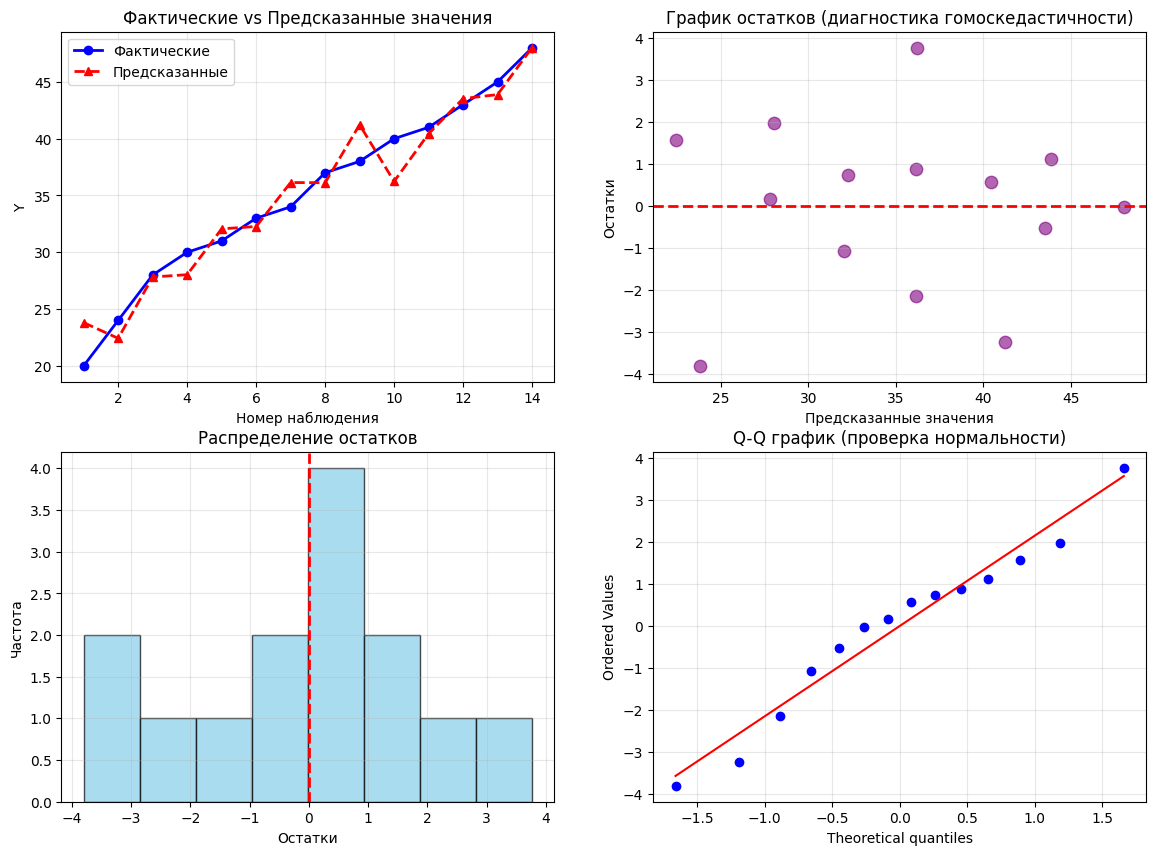

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(range(1, n+1), Y, 'bo-', label='Фактические', linewidth=2)
axes[0, 0].plot(range(1, n+1), Y_pred, 'r^--', label='Предсказанные', linewidth=2)
axes[0, 0].set_xlabel('Номер наблюдения')
axes[0, 0].set_ylabel('Y')
axes[0, 0].set_title('Фактические vs Предсказанные значения')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(Y_pred, residuals, c='purple', alpha=0.6, s=80)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Предсказанные значения')
axes[0, 1].set_ylabel('Остатки')
axes[0, 1].set_title('График остатков (диагностика гомоскедастичности)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(residuals, bins=8, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Остатки')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение остатков')
axes[1, 0].grid(True, alpha=0.3)

stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q график (проверка нормальности)')
axes[1, 1].grid(True, alpha=0.3)

In [ ]:
plt.tight_layout()
plt.savefig('regression_analysis_v12.png', dpi=150, bbox_inches='tight')
print("Графики сохранены в файл: regression_analysis_v12.png")
print()

print("="*60)
print("АНАЛИЗ ЗАВЕРШЕН")
print("="*60)

Графики сохранены в файл: regression_analysis_v12.png

АНАЛИЗ ЗАВЕРШЕН


<Figure size 640x480 with 0 Axes>